# Conclusions #
I've made the following conclusions about Xtern Xpress. The supporting code can be found below this cell. We will assume that a 1-unit change in latitude or longitude corresponds to one mile.

The most popular location for Xpress scooter users is about (-0.120500, -0.212989). From the graph we cannot see this popularity as all of the points are clustered together. However, we can see that there is a large gap in the middle, from x-coordinates of 0.50 to 0.75 and y-coordinates of 0.30 to 0.55.

The time needed to charge all scooters is 64271 hours. As we can see from the histogram, most scooters are already fully charged, so this time is not as long as one might first expect.

To determine the optimal charging strategy, we first must select only the scooters that need to be charged, then sort them by distance from the bus station. We can test out three different strategies: charging scooters solely based on location, charging solely based on power level, and charging based on a combination of the two. As shown by the summary bar graph at the bottom, the fastest charging strategy is to consider a combination of the two metrics: first, the bus would target the scooters closest to it, then determine the order of charging based on how much the scooter needs to charge. This strategy, however, is only marginally better than the first option of charging solely based on location. The last strategy, charging based on power level, is much too inefficient.

# Code #

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

scooters = pd.read_csv('2019-XTern- Work Sample Assessment Data Science-DS.csv')
print(scooters.head())

# Number of scooters: 25668
print(len(scooters))

   scooter_id  xcoordinate  ycoordinate  power_level
0           0     0.906835     0.776484            0
1           1     0.928587     0.804964            2
2           2     0.904091     0.784043            1
3           3     0.906752     0.804461            0
4           4     0.900641     0.781683            4
25668


Most popular x-coord: -0.120499626
Most popular y-coord: -0.21298939999999997
Most popular location: (-0.120499626, -0.21298939999999997)


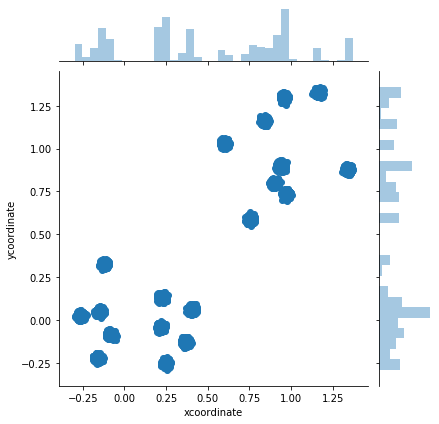

In [2]:
# Determining location popularity
pop_x = scooters['xcoordinate'].value_counts().idxmax()
print("Most popular x-coord:", pop_x)
pop_y = scooters['ycoordinate'].value_counts().idxmax()
print("Most popular y-coord:", pop_y)
print("Most popular location: ({0}, {1})".format(pop_x, pop_y))

sns.jointplot(x = 'xcoordinate', y = 'ycoordinate', data = scooters)

AxesSubplot(0.125,0.125;0.775x0.755)
Time needed to charge all scooters: 64271


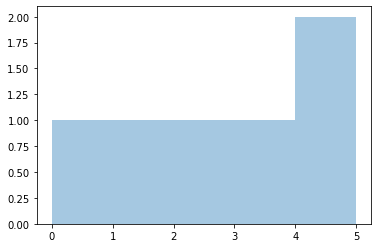

In [3]:
# Determining time to charge all of the scooters
full_charge_time = 5 # no magic numbers!
scooter_power_levels = sns.distplot(scooters['power_level'].unique(), kde = False, bins = 5, norm_hist = False)
print(scooter_power_levels)

scooters['time_to_charge'] = full_charge_time - scooters['power_level']
total_time_to_charge = sum(scooters['time_to_charge'])
print("Time needed to charge all scooters:", total_time_to_charge)

In [4]:
# Developing a charging strategy
to_charge = scooters.where(scooters['power_level'] < 5)
print("Number of scooters we need to charge:", len(to_charge))

# Distance to the bus station
def distance(x, y):
    bus_x = 20.19
    bus_y = 20.19
    return np.sqrt((bus_x - x)**2 + (bus_y - y)**2)

to_charge['distance'] = to_charge.apply(lambda d: distance(d['xcoordinate'], d['ycoordinate']), axis = 1)
to_charge = to_charge.fillna(to_charge.mean())
print("Minimum distance to bus station:", min(to_charge['distance']))
print("Maximum distance to bus station:", max(to_charge['distance']))
print(to_charge.head())

Number of scooters we need to charge: 25668
Minimum distance to bus station: 26.75700023626647
Maximum distance to bus station: 28.85182478901359
   scooter_id  xcoordinate  ycoordinate  power_level  time_to_charge  \
0         0.0     0.906835     0.776484          0.0             5.0   
1         1.0     0.928587     0.804964          2.0             3.0   
2         2.0     0.904091     0.784043          1.0             4.0   
3         3.0     0.906752     0.804461          0.0             5.0   
4         4.0     0.900641     0.781683          4.0             1.0   

    distance  
0  27.362841  
1  27.327306  
2  27.359412  
3  27.343057  
4  27.363518  


In [5]:
# Charging by location
bus_speed = 50

to_charge = to_charge.sort_values(by = ['distance'])
to_charge['loc_index'] = list(range(len(to_charge)))
to_charge = to_charge.set_index('loc_index')
print(to_charge.head())

loc_charge_time = 0
for i in range(1, len(to_charge)):
    travel_time = abs(to_charge.iloc[i]['distance'] - to_charge.iloc[i - 1]['distance']) / bus_speed
    loc_charge_time += to_charge.iloc[i]['time_to_charge'] + travel_time
loc_charge_time += to_charge.iloc[0]['time_to_charge'] + to_charge.iloc[0]['distance']

print("Charging by location takes", loc_charge_time, "hours.")

           scooter_id  xcoordinate  ycoordinate  power_level  time_to_charge  \
loc_index                                                                      
0              3027.0     1.188913     1.351323          2.0             3.0   
1              2809.0     1.196355     1.339839          4.0             1.0   
2              3059.0     1.184466     1.347022          2.0             3.0   
3              3451.0     1.174677     1.354255          4.0             1.0   
4              2703.0     1.188549     1.339713          4.0             1.0   

            distance  
loc_index             
0          26.757000  
1          26.759804  
2          26.763186  
3          26.765048  
4          26.765434  
Charging by location takes 77387.08156964899 hours.


In [6]:
# Charging by power level
to_charge = to_charge.sort_values(by = ['power_level'])
to_charge['power_index'] = list(range(len(to_charge)))
to_charge = to_charge.set_index('power_index')
print(to_charge.head())

power_charge_time = 0
for i in range(1, len(to_charge)):
    travel_time = abs(to_charge.iloc[i]['distance'] - to_charge.iloc[i - 1]['distance']) / bus_speed
    power_charge_time += to_charge.iloc[i]['time_to_charge'] + travel_time
power_charge_time += to_charge.iloc[0]['time_to_charge'] + to_charge.iloc[0]['distance']

print("Charging by power level takes", power_charge_time, "hours.")

             scooter_id  xcoordinate  ycoordinate  power_level  \
power_index                                                      
0               15551.0     0.218402    -0.033887          0.0   
1                2609.0    -0.072161    -0.063691          0.0   
2               15507.0     0.212575    -0.053838          0.0   
3                1624.0    -0.068916    -0.066436          0.0   
4                4661.0     0.210061     0.119162          0.0   

             time_to_charge   distance  
power_index                             
0                       5.0  28.423060  
1                       5.0  28.649034  
2                       5.0  28.441352  
3                       5.0  28.648680  
4                       5.0  28.320249  
Charging by power level takes 77644.2093433874 hours.


In [8]:
# Charging by location and power level
to_charge = to_charge.reset_index(drop = True)
to_charge = to_charge.sort_values(by = ['distance', 'time_to_charge'])
to_charge['both_index'] = list(range(len(to_charge)))
to_charge = to_charge.set_index('both_index')
print(to_charge.head())

both_charge_time = 0
for i in range(1, len(to_charge)):
    travel_time = abs(to_charge.iloc[i]['distance'] - to_charge.iloc[i - 1]['distance']) / bus_speed
    both_charge_time += to_charge.iloc[i]['time_to_charge'] + travel_time
both_charge_time += to_charge.iloc[0]['time_to_charge'] + to_charge.iloc[0]['distance']

print("Charging by both distance and power level takes", both_charge_time, "hours.")

            scooter_id  xcoordinate  ycoordinate  power_level  time_to_charge  \
both_index                                                                      
0               3027.0     1.188913     1.351323          2.0             3.0   
1               2809.0     1.196355     1.339839          4.0             1.0   
2               3059.0     1.184466     1.347022          2.0             3.0   
3               3451.0     1.174677     1.354255          4.0             1.0   
4               2703.0     1.188549     1.339713          4.0             1.0   

             distance  
both_index             
0           26.757000  
1           26.759804  
2           26.763186  
3           26.765048  
4           26.765434  
Charging by both distance and power level takes 77387.08156964899 hours.


(77000, 77700)

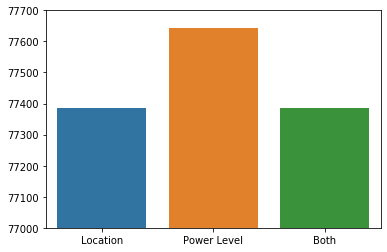

In [19]:
# Charging strategy summary
times = [loc_charge_time, power_charge_time, both_charge_time]
sns.barplot(x = ["Location", "Power Level", "Both"], y = times).set_ylim(77000, 77700)